In [18]:
import sys
sys.path.append('../')
sys.path.append('../src/')

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

from src.utils import load_moons, load_monk1, load_mnist
from src.network import Network
from src.activations import ReLU, Tanh, Sigmoid
from src.losses import MeanSquaredError
from src.metrics import BinaryAccuracy, MulticlassAccuracy

from sklearn.metrics import accuracy_score

## Moons Dataset

In [21]:
x_train, x_val, x_test, y_train, y_val, y_test = load_moons(validation=True, noise=0.5)

In [20]:
model = Network(2)
model.add_layer(16, ReLU())
model.add_layer(1, Tanh())

stats = model.train(train=(x_train, y_train), validation=(x_val, y_val), metric=BinaryAccuracy(), loss=MeanSquaredError(), epochs=500)

Training:   0%|          | 0/500[]

<AxesSubplot: >

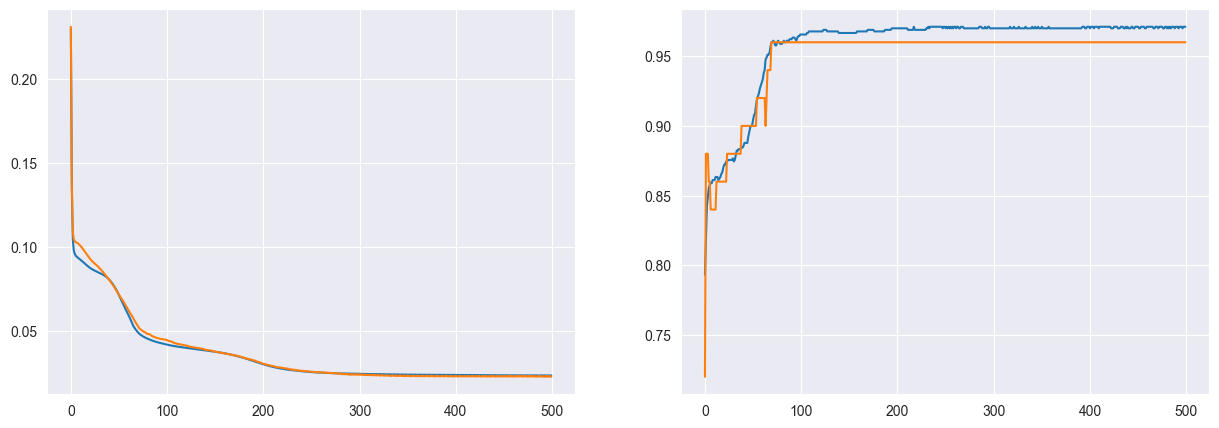

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])

In [13]:
predictions = model.multiple_outputs(x_test)

accuracy_score(y_test.flatten(), np.round(predictions.flatten()))

1.0

In [ ]:
x_train, x_val, x_test, y_train, y_val, y_test = load_monk1()

In [ ]:
model = Network(17)
model.add_layer(8, ReLU())
model.add_layer(1, Tanh())
stats = model.train(x_train, y_train, x_test, y_test, metric=BinaryAccuracy(), loss=MeanSquaredError(), epochs=500)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])


In [ ]:
x_train, x_test, y_train, y_test = load_mnist()

In [ ]:
model = Network(64)
model.add_layer(16, ReLU())
model.add_layer(10, Sigmoid(0.001))
stats = model.train(x_train, y_train, x_test, y_test, metric=MulticlassAccuracy(), loss=MeanSquaredError(), epochs=500)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(stats['train_loss'], ax=axs[0])
sns.lineplot(stats['val_loss'], ax=axs[0])
sns.lineplot(stats['train_acc'], ax=axs[1])
sns.lineplot(stats['val_acc'], ax=axs[1])